<a href="https://colab.research.google.com/github/MatheusHavoc/walmart/blob/main/walmart24(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Contextualização

*  Você foi contratado pelo Walmart para fazer um levantamento do
faturamento das lojas nos USA e apontar qual loja seria melhor para
expandir seu tamanho.


*  É preciso analisar as vendas semanais de cada loja, calcular algumas
informações importantes que serão perguntadas e aoo final de tudo, indicar
em qual loja deva ser investida.




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CARREGAMENTO DAS BIBLIOTECAS
CARREGAMENTO DOS DADOS

Vou fazer algumas modificações na Data e tipoo de variáveis 

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
plt.style.use('dark_background')

df_Original = pd.read_csv('/content/drive/MyDrive/arquivos análise /Walmart.csv')

data = df_Original['Date'].astype('datetime64')
df_Original['Date'] = data 
df_Original['Store'] = df_Original['Store'].astype("int64")  

df_Original['ano'] = df_Original['Date'].apply(lambda x: str(x)[:4])
df_Original['mes'] = df_Original['Date'].apply(lambda x: str(x)[5:7])

## Não apresentar ter dados nulos





In [3]:
df_Original.isnull().sum() / df_Original.shape[0]

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
ano             0.0
mes             0.0
dtype: float64

# Os significados de cada coluna

##Store : Número da Loja

##Date : Semana de Venda

##Weekly_Sales: Venda Naquela Semana

##Holiday_Flag Flag se é ou não semana com feriado (1 -
##Holiday Week 0 - Non-Holiday Week)

##Temperature: Temperatura do dia em °F

##Fuel_Price : Preço do combustível na região da loja

##CPI : Índice de preços ao consumidor

##Unemployment : Taxa de desemprego



##observando atribuição de valores das vendas

In [4]:
pd.DataFrame(df_Original['Weekly_Sales'].describe())

,Weekly_Sales
count,6.435000e+03
mean,1.046965e+06
std,5.643666e+05
min,2.099862e+05
25%,5.533501e+05
50%,9.607460e+05
75%,1.420159e+06
max,3.818686e+06


In [5]:
df_Original.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,ano,mes
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,05
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,05


In [6]:
corelacao = df_Original
var_corr_original = corelacao.corr()
var_corr_original['Weekly_Sales'].sort_values(ascending=False).round(3)

Weekly_Sales    1.000
Holiday_Flag    0.037
Fuel_Price      0.009
Temperature    -0.064
CPI            -0.073
Unemployment   -0.106
Store          -0.335
Name: Weekly_Sales, dtype: float64

#correlação de alguns valores estão muito fraco, ou seja tem pouco impacto com vendas

In [7]:
df_grupStore = df_Original.groupby('Store')
corelacao = df_grupStore
var_corr_Gy = corelacao.corr()
var_corr_Gy['Weekly_Sales'].sort_values(ascending=False).round(3)

Store              
1      Weekly_Sales    1.000
13     Weekly_Sales    1.000
17     Weekly_Sales    1.000
16     Weekly_Sales    1.000
36     Weekly_Sales    1.000
                       ...  
35     Fuel_Price     -0.498
36     Fuel_Price     -0.727
44     Unemployment   -0.780
38     Unemployment   -0.785
36     CPI            -0.915
Name: Weekly_Sales, Length: 270, dtype: float64

##interessante ao agrupar os dados por loja, correlação de alguns valores aumentaram

In [8]:
from pyparsing.helpers import line
plt.figure(figsize = [12, 8])
var_corr_original.style.background_gradient(cmap ='coolwarm')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.335332,-0.000000,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-0.335332,1.000000,0.036891,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-0.000000,0.036891,1.000000,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-0.022659,-0.063810,-0.155091,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.060023,0.009464,-0.078347,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.209492,-0.072634,-0.002162,0.176888,-0.170642,1.000000,-0.302020
Unemployment,0.223531,-0.106176,0.010960,0.101158,-0.034684,-0.302020,1.000000


<Figure size 864x576 with 0 Axes>

#Weekly_Sales parece haver correlação com algumas colunas:

Temperature,
CPI,
Unemployment,

porém essa é visão geral, vai depdender de loja pra loja, se afetará pra mais ou menos.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


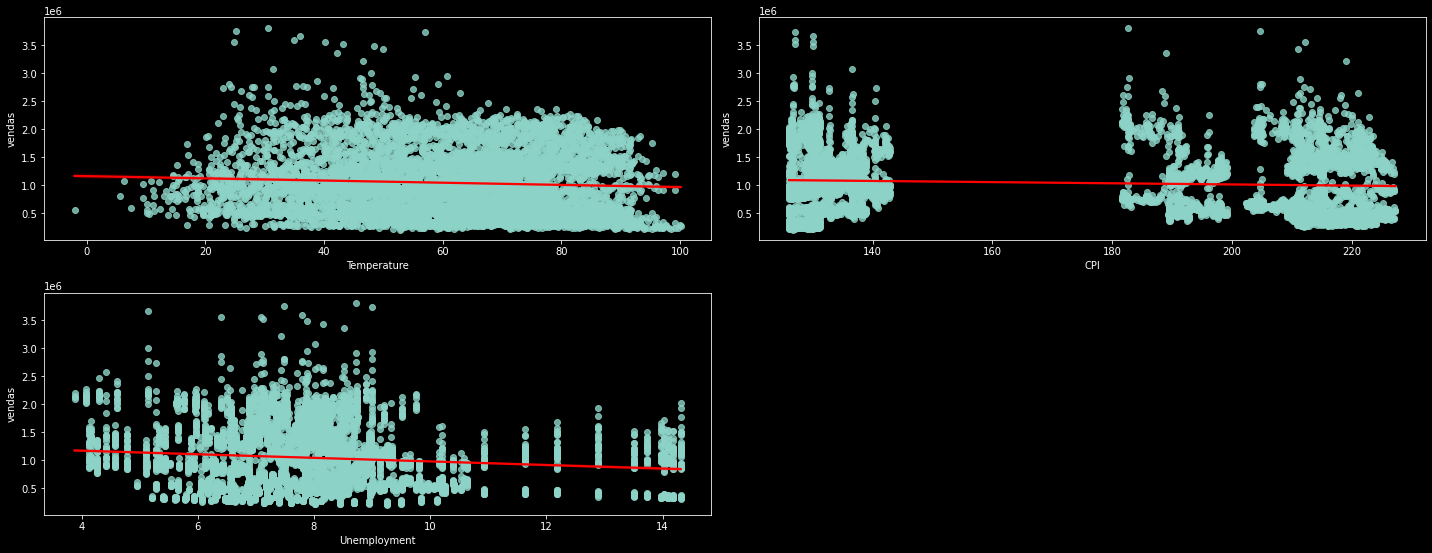

In [9]:
plt.style.use('dark_background')
cols = df_Original[['Temperature', 'CPI', 'Unemployment']]

cols.corr()
plt.figure(figsize=[ 20, 15])

i = 1

for col in cols:
    if col == 'Weekly_Sales':
        continue
    plt.subplot(4, 2, i)
    sns.regplot(df_Original[col], df_Original['Weekly_Sales'], line_kws={'color': 'r'})
    plt.xlabel(col)
    plt.ylabel('vendas')
    i+=1
    
plt.tight_layout();
plt.show();

##Temperatura do dia em °F: a maior concentração de vendas estar entre 21f a 90f que séria -6c a 32c, logo após começa a cair as vendas.

##CPI Índice de preços ao consumidor apenas observei lacuna 140 a 180, lojas com cpi menor a 140 apresentar maiores vendas.


##Unemployment Taxa de desemprego até 9% parece manter padrão,mas com taxa maior logo as vendas começa a cair.

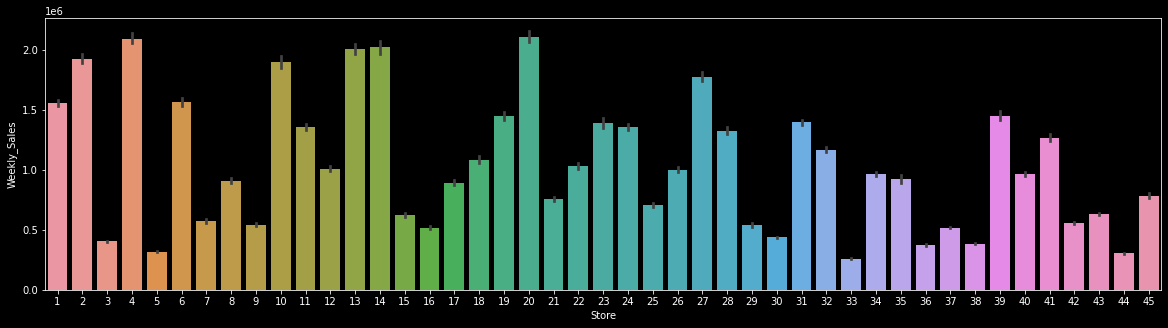

In [10]:
fig = plt.figure(figsize = (20, 5 ))
sns.barplot(x = 'Store', y = 'Weekly_Sales', data = df_Original)
plt.show()

#As concentrações de vendas então entre a lojas 1 até a 20, apesar ter algumas lojas com poucas vendas também no meio delas. 

#Mas com esse gráfico não consigo mensurar diferença entre as top 5 com mais vendas.

In [11]:
# Agruoando por lojas, mês, ano e tabem peguei a mediana Temperature, cpi e Unemployment
df_Melhores_vendas = df_Original.groupby(['Store','mes','ano']).agg({'Weekly_Sales': 'median' , 'Temperature': 'median', 'Unemployment' : 'median'}).reset_index()
df_Melhores_vendas = df_Melhores_vendas.rename(columns = {'Weekly_Sales':'mediana'}) 
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Mudando a formatação
pd.options.display.float_format = '{:.2f}'.format
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------
#pegando loja 1 até 20
df_20 = df_Melhores_vendas[(df_Melhores_vendas.Store <=20)]

#agrupei por lojas, mês, ano e tabem peguei a mediana Temperature, cpi e Unemployment
fiz mais algumas manipulações, reorganização e renomeaçãoes

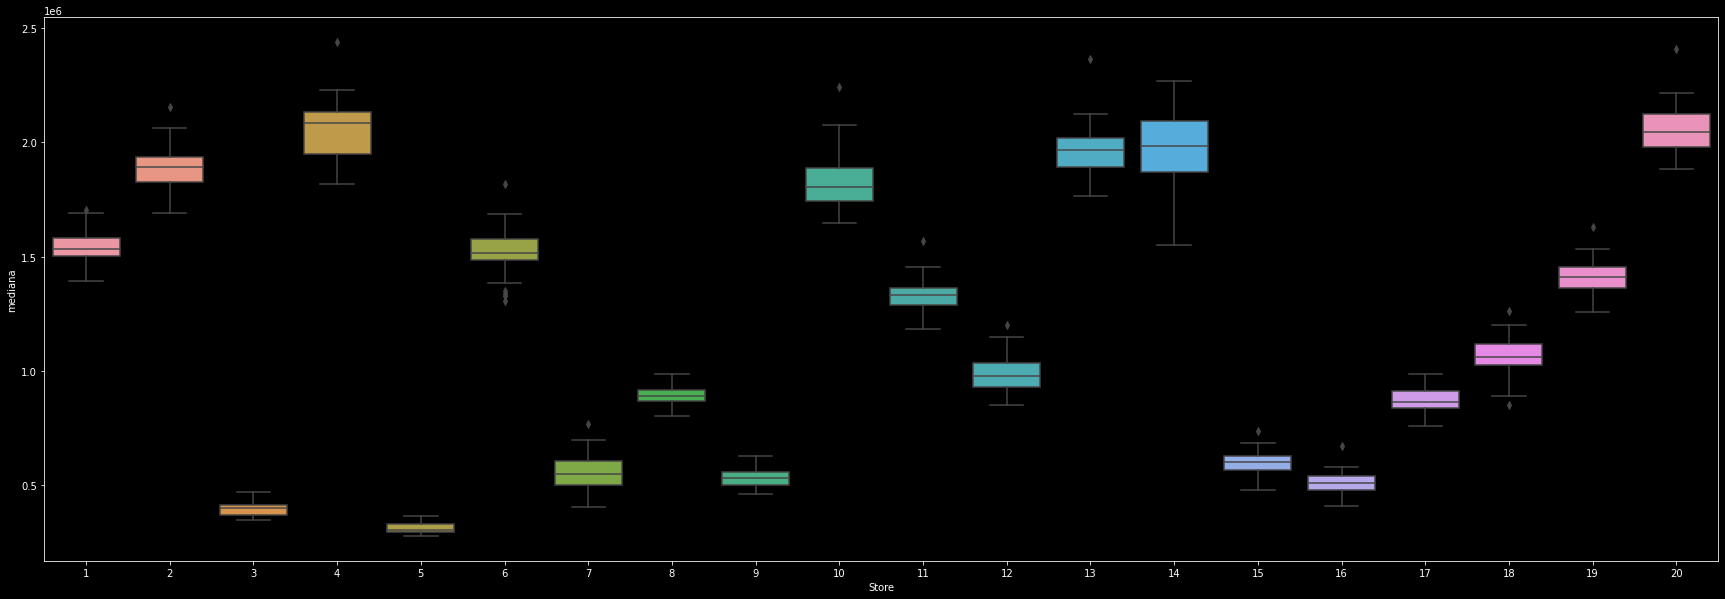

In [12]:
plt.figure(figsize=(30,10))
sns.boxplot(x = 'Store', y = 'mediana', data = df_20)

## Agora sim, consigo ver proporção de cada uma das lojas, percebo claramente que loja 4 e 14 apresenta maiores valores.

##puxando a loja 4 e 14




In [13]:
df_selecao14 = df_Original[(df_Original.Store == 14)]
df_selecao4 = df_Original[(df_Original.Store == 4)] 


## antes prossegui queria ver como foi distribuição das vendas por mês e ano a ano entre as duas lojas

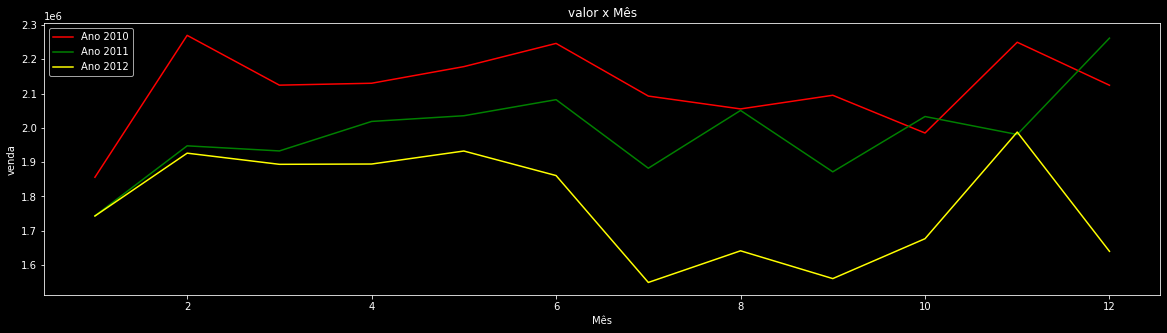

In [14]:
plt.figure(figsize=(20, 5))
#Selecionando apenas as vendas de 2010
df_2010 = df_selecao14[df_selecao14["Date"].dt.year == 2010]
#Selecionando apenas as vendas de 2011
df_2011 = df_selecao14[df_selecao14["Date"].dt.year == 2011]
#Selecionando apenas as vendas de 2012
df_2012 = df_selecao14[df_selecao14["Date"].dt.year == 2012]
# Comparativo de Weekly_Sales por mês e ano a ano
df_2010.groupby(df_2010["Date"].dt.month)["Weekly_Sales"].median().plot(color='red', label='Ano 2010')
df_2011.groupby(df_2011["Date"].dt.month)["Weekly_Sales"].median().plot(color='green', label='Ano 2011')
df_2012.groupby(df_2012["Date"].dt.month)["Weekly_Sales"].median().plot(color='yellow', label='Ano 2012')
plt.title("valor x Mês")
plt.xlabel("Mês")
plt.ylabel("venda")
plt.legend()
plt.show()

#Apesar de ter histórico alta por causa das vendas ano 2010, essa loja apresenta uma queda ano após ano.

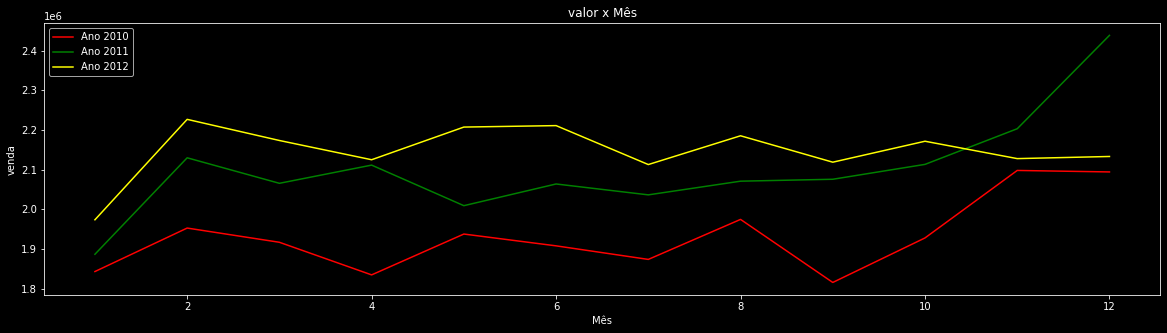

In [15]:
plt.figure(figsize=(20, 5))
#Selecionando apenas as vendas de 2010
df_2010 = df_selecao4[df_selecao4["Date"].dt.year == 2010]
#Selecionando apenas as vendas de 2011
df_2011 = df_selecao4[df_selecao4["Date"].dt.year == 2011]
#Selecionando apenas as vendas de 2012
df_2012 = df_selecao4[df_selecao4["Date"].dt.year == 2012]
# Comparativo de Weekly_Sales por mês e ano a ano
df_2010.groupby(df_2010["Date"].dt.month)["Weekly_Sales"].median().plot(color='red', label='Ano 2010')
df_2011.groupby(df_2011["Date"].dt.month)["Weekly_Sales"].median().plot(color='green', label='Ano 2011')
df_2012.groupby(df_2012["Date"].dt.month)["Weekly_Sales"].median().plot(color='yellow', label='Ano 2012')
plt.title("valor x Mês")
plt.xlabel("Mês")
plt.ylabel("venda")
plt.legend()
plt.show()

#interessante a loja 4 parace ter evolução ano a ano, apesar mês 11 de 2011 ser maior de que final 2012, 2012 sempre se manteve acima de 2011

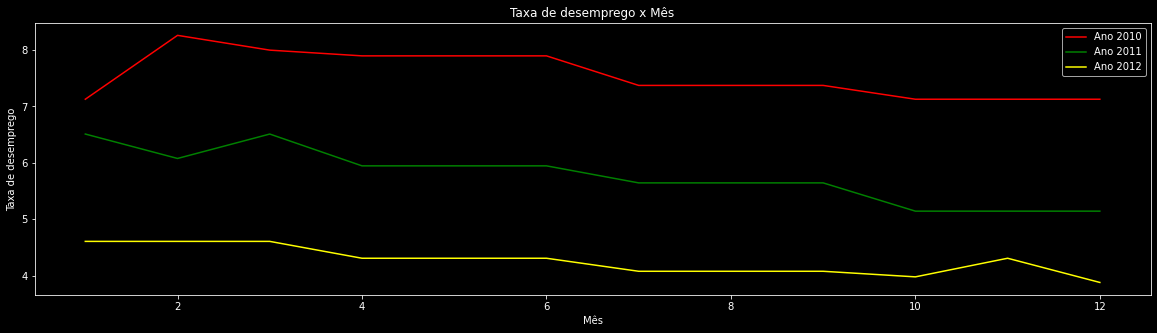

In [16]:
plt.figure(figsize=(20, 5))
#Selecionando apenas os Unemployment de 2010
df_2010 = df_selecao4[df_selecao4["Date"].dt.year == 2010]
#Selecionando apenas os Unemployment de 2011
df_2011 = df_selecao4[df_selecao4["Date"].dt.year == 2011]
#Selecionando apenas ao Unemployment de 2012
df_2012 = df_selecao4[df_selecao4["Date"].dt.year == 2012]
# Comparativo de Unemployment  por mês e ano a ano
df_2010.groupby(df_2010["Date"].dt.month)["Unemployment"].median().plot(color='red', label='Ano 2010')
df_2011.groupby(df_2011["Date"].dt.month)["Unemployment"].median().plot(color='green', label='Ano 2011')
df_2012.groupby(df_2012["Date"].dt.month)["Unemployment"].median().plot(color='yellow', label='Ano 2012')
plt.title("Taxa de desemprego x Mês")
plt.xlabel("Mês")
plt.ylabel("Taxa de desemprego")
plt.legend()
plt.show()

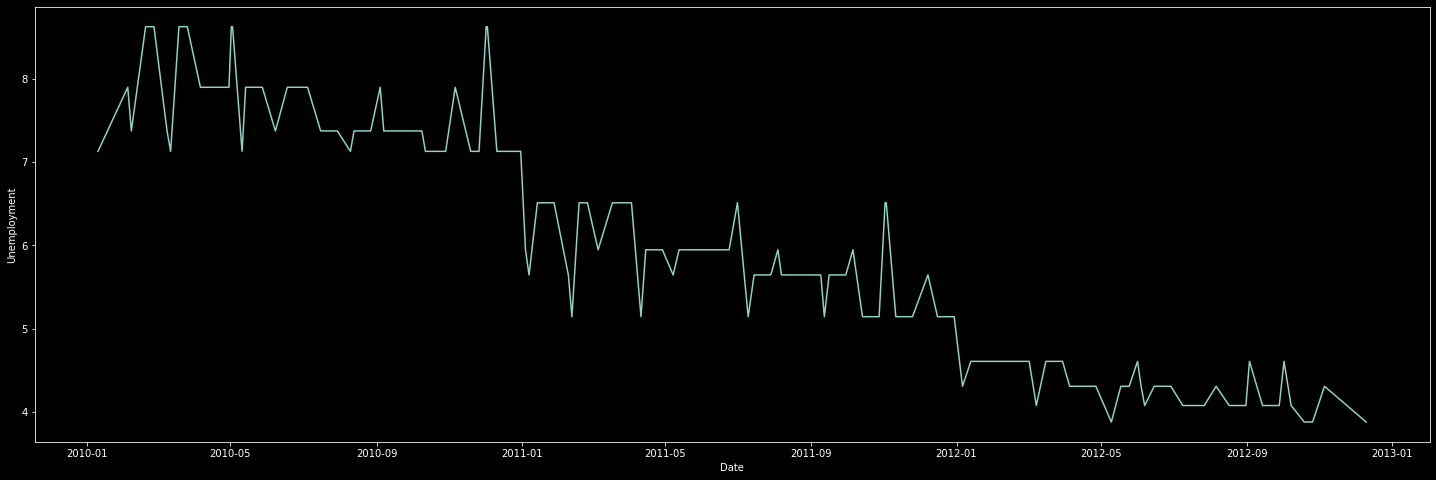

In [17]:
plt.subplots(figsize=(25,8))
sns.lineplot(data = df_selecao4, x = df_selecao4['Date'], y= df_selecao4['Unemployment'])
plt.show()

##Na localização loja 4 a Taxa de desemprego esta caindo ano a ano.

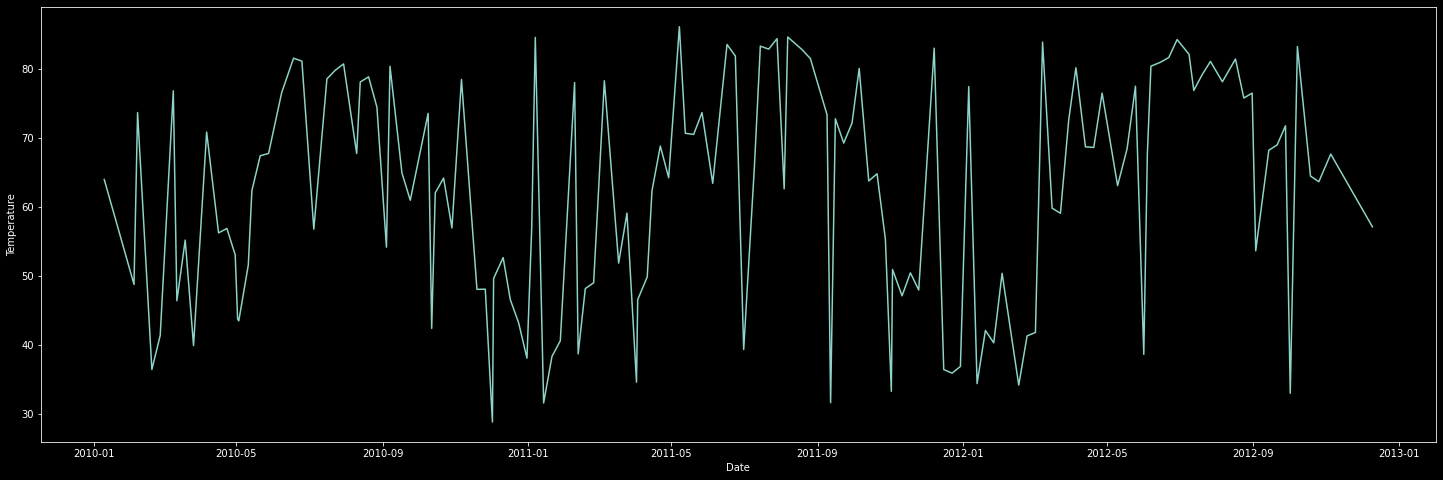

In [18]:
plt.subplots(figsize=(25,8))
sns.lineplot(data = df_selecao4, x = df_selecao4['Date'], y= df_selecao4['Temperature'])
plt.show()

##temperatura estar dentro do padrão que observamos no gráfico de dispersão anterior.

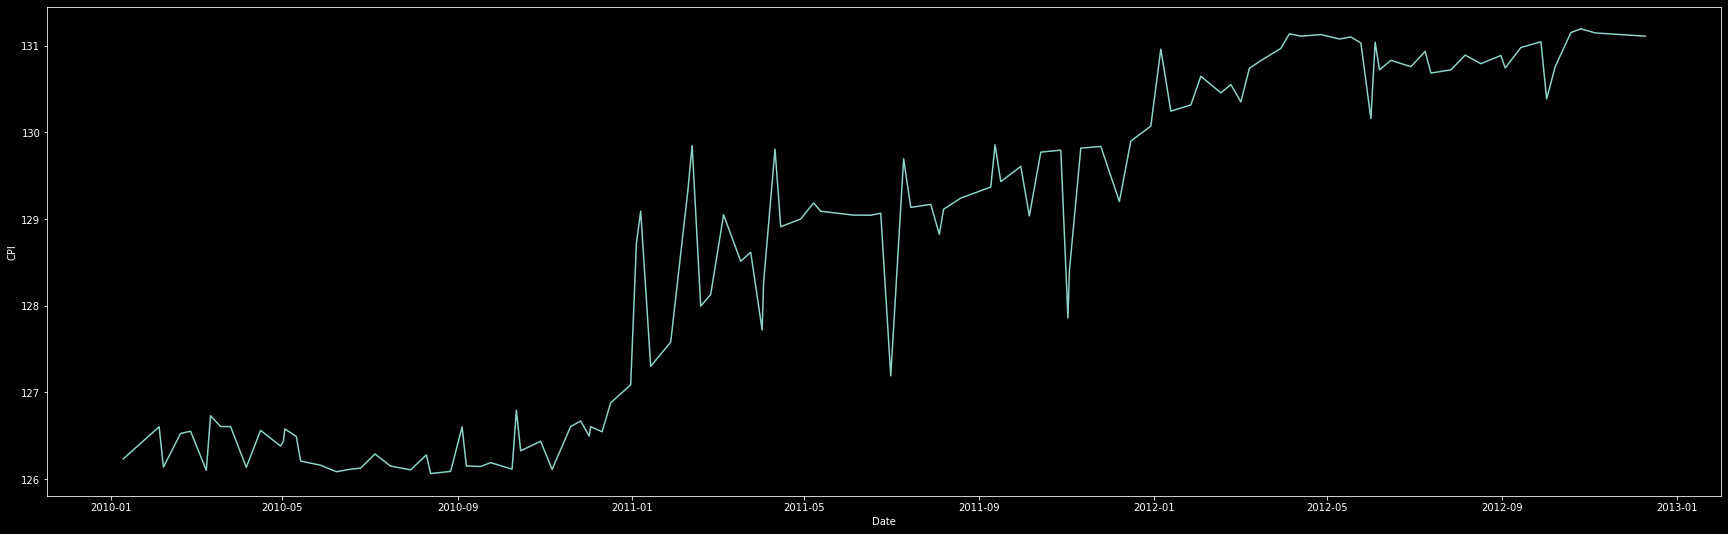

In [19]:
plt.subplots(figsize=(30,9))
sns.lineplot(data = df_selecao4, x = df_selecao4['Date'], y= df_selecao4['CPI'])
plt.show()

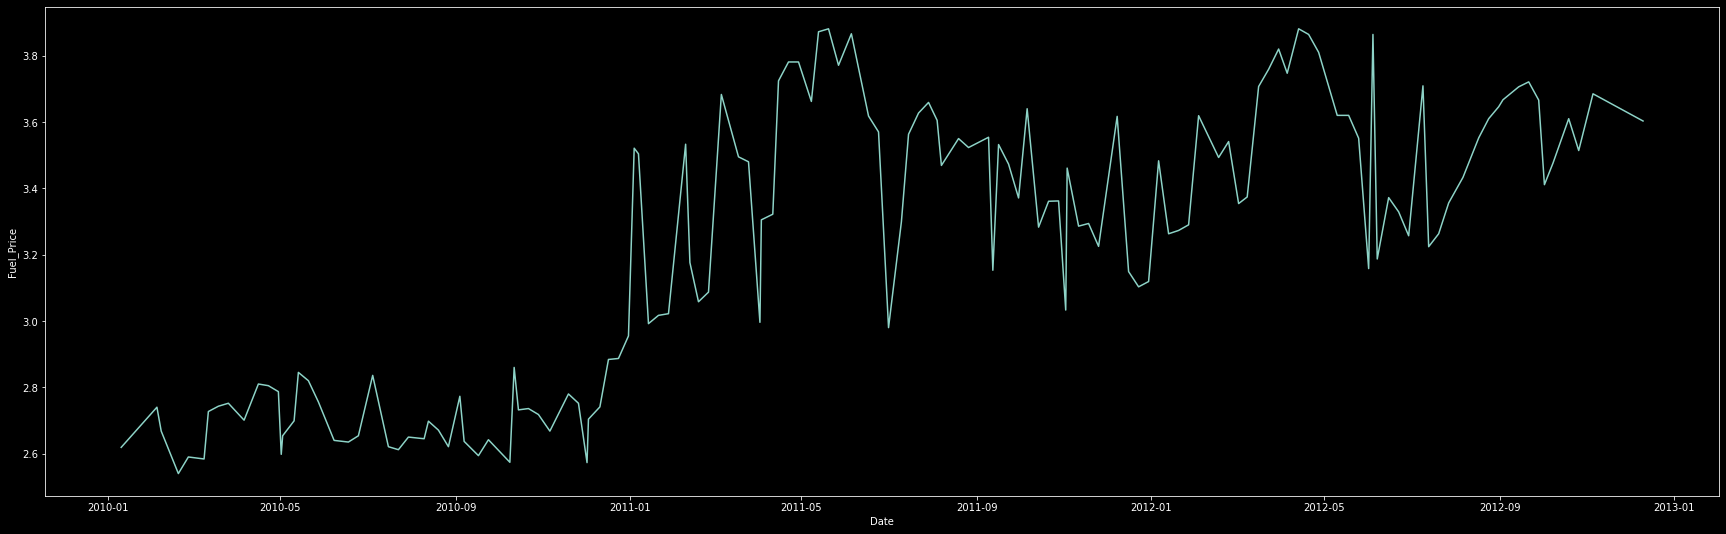

In [20]:
plt.subplots(figsize=(30,9))
sns.lineplot(data = df_selecao4, x = df_selecao4['Date'], y= df_selecao4['Fuel_Price'])
plt.show()

 ## Apesar Cpi e Fuel_Price subir ano a ano, é possível perceber que loja 4 consegue manter crescimento. 
#Baixa taxa de desemprego "pode esta" compensado.

## Previsão de Séries Temporais com “Prophet”

In [38]:
from prophet import Prophet
df_Melhor =   df_selecao4   

df_Melhor = df_Melhor.rename(columns={"Date": "ds", "Weekly_Sales": "y"})

# Instanciando o modelo
modelo = Prophet()

# Ajustando o modelo aos dados
modelo.fit(df_Melhor)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsnr9waxa/g5ckkcs4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsnr9waxa/4pnqy16e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78184', 'data', 'file=/tmp/tmpsnr9waxa/g5ckkcs4.json', 'init=/tmp/tmpsnr9waxa/4pnqy16e.json', 'output', 'file=/tmp/tmpsnr9waxa/prophet_model1uo74pfg/prophet_model-20221207233013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:30:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:30:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [49]:
# Criando dataframe com os períodos futuros para as previsões
st_futuro = modelo.make_future_dataframe(
    periods= 5, 
    freq = 'w', 
    include_history = True

)

In [50]:
# Realizando as previsões
previsao_Prophet = modelo.predict(st_futuro)

# Minha recomendação é **loja 4**, pós ja esta gerando grande quantidades vendas  em comparação a outras lojas, apresentar crescimento ano a ano, e também esta localizada uma região que taxa de desemprego esta diminuindo ano  a ano.

## Com base um modelo Previsão de Séries Temporais, a **loja 4 tende a continuar crescendo**.

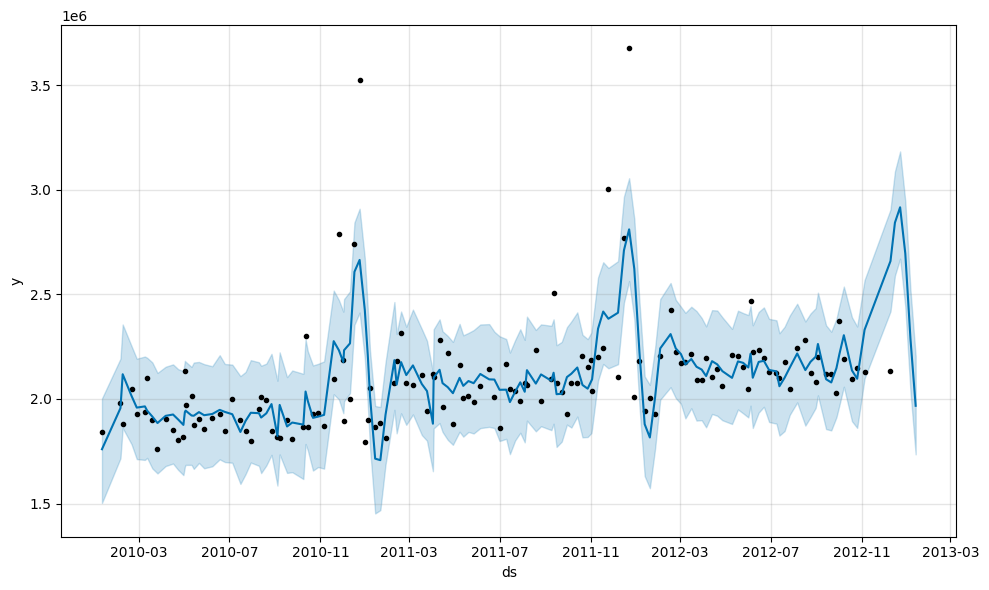

In [51]:
# Fazendo grafico da previsao
plt.style.use('default')
grafico_previsao_Prophet = modelo.plot(previsao_Prophet)
grafico_previsao_Prophet.show()

In [42]:
df_selecao20 = df_Original[(df_Original.Store == 20)] 

